In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [39]:
df = pd.read_csv('Restaurant-Dataset/Independence100.csv',index_col=0)
df

,Restaurant,Sales,Average Check,City,State,Meals Served
Rank,,,,,,
1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0
...,...,...,...,...,...,...
96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0
97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0
98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0


In [18]:
df.dtypes

Restaurant        object
Sales            float64
Average Check      int64
City              object
State             object
Meals Served     float64
dtype: object

In [20]:
#COLUMNA  ---> Sales

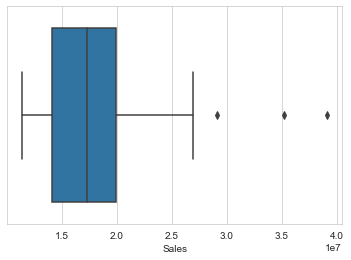

In [5]:
#Analisis de la informacion usando box plots
#Analisamos la columna de Sales
sns.set_style("whitegrid") # Establece el estilo de la gráfica (https://seaborn.pydata.org/tutorial/aesthetics.html)
sns.boxplot(x=df['Sales']);

In [9]:
#Ahora sabemos que la mayoría de nuestros datos están concentrados en valores menores a 2.7 y que las ventas muy altas son anomalías en nuestro conjunto.
#Dentro del rango total de los datos, tenemos una distribución que tiende hacia los valores más pequeños.
#También sabemos que nuestros datos en general están muy concentrados (o sea, poco dispersos), pero que hay una "colita" de datos hacia la derecha que se extiende un poco

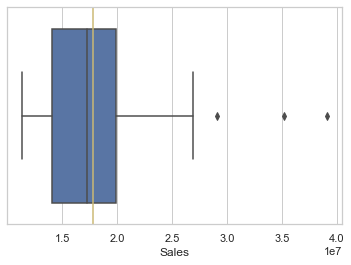

In [6]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Sales'])
plt.axvline(df['Sales'].mean(), c='y'); # (valor de la línea, color)
#En la siguiente grafica visualizamos el valor del  promedio en amarillo y vemos que esta muy cerca al percentil 50

In [10]:
iqr = df['Sales'].quantile(0.75) - df['Sales'].quantile(0.25)
filtro_inferior = df['Sales'] > df['Sales'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['Sales'] < df['Sales'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]

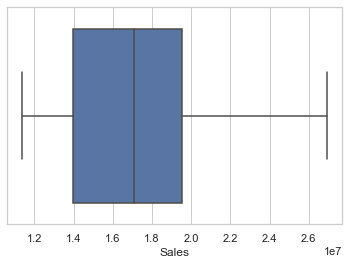

In [11]:
sns.boxplot(x=df_filtrado['Sales']);
#Filtrado los vaores atipicos vemos que ya todos los datos quedan dentro de los valores

In [19]:
#COLUMNA  ---> Average Check

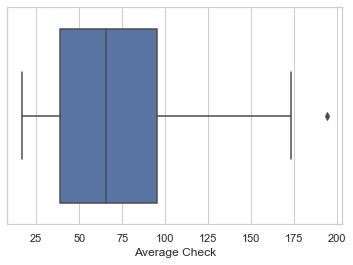

In [15]:
#Analisamos la columna de Average Check
#Ahora sabemos que la mayoría de nuestros datos están concentrados en valores menores a 175 y que hay pocas anomalias
sns.set_style("whitegrid") # Establece el estilo de la gráfica (https://seaborn.pydata.org/tutorial/aesthetics.html)
sns.boxplot(x=df['Average Check']);

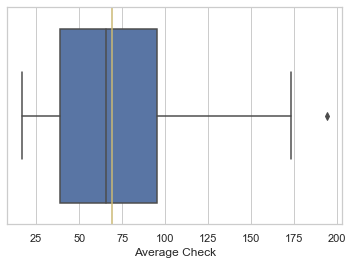

In [17]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Average Check'])
plt.axvline(df['Average Check'].mean(), c='y'); # (valor de la línea, color)
#En la siguiente grafica visualizamos el valor del  promedio en amarillo y vemos que esta muy cerca al percentil 50

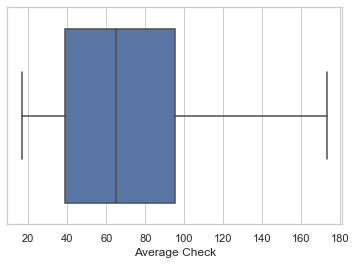

In [16]:
iqr = df['Average Check'].quantile(0.75) - df['Average Check'].quantile(0.25)
filtro_inferior = df['Average Check'] > df['Average Check'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['Average Check'] < df['Average Check'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]
sns.boxplot(x=df_filtrado['Average Check']);
#Rango Intercuartílico quito el valor anomalo

In [21]:
#COLUMNA  ---> Sales

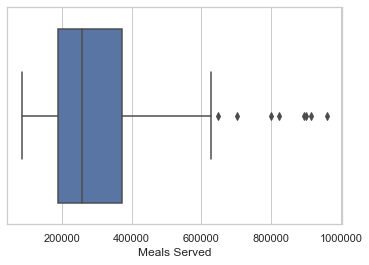

In [22]:
sns.set_style("whitegrid") # Establece el estilo de la gráfica (https://seaborn.pydata.org/tutorial/aesthetics.html)
sns.boxplot(x=df['Meals Served']);

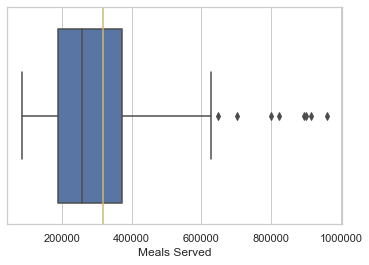

In [23]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Meals Served'])
plt.axvline(df['Meals Served'].mean(), c='y'); # (valor de la línea, color)

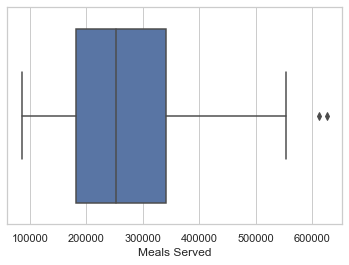

In [26]:
iqr = df['Meals Served'].quantile(0.75) - df['Meals Served'].quantile(0.25)
filtro_inferior = df['Meals Served'] > df['Meals Served'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['Meals Served'] < df['Meals Served'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]
sns.boxplot(x=df_filtrado['Meals Served']);

#Siguen quedando unos cuantos valores anomalos

In [32]:
#TABLA DE FRECUENCIAS PARA Meals Served
#------------------------------------------------------
#Como la tabla columna tiene muchas anomalias obtendremos la tabla de frecuencia para ver como se distribuyen las anomalias por tango
meals = df['Meals Served']
meals.max() - meals.min() #rango
segmentos = pd.cut(meals, 10)

#Agrupamos por los segmentos y contamos cuantos registros caen en ese segmento o rango
df['Meals Served'].groupby(segmentos).count() # SELECT price,  count(*) FROM df GROUP BY price


Meals Served
(86198.044, 174265.6]    18
(174265.6, 261461.2]     33
(261461.2, 348656.8]     19
(348656.8, 435852.4]     12
(435852.4, 523048.0]      6
(523048.0, 610243.6]      2
(610243.6, 697439.2]      3
(697439.2, 784634.8]      1
(784634.8, 871830.4]      2
(871830.4, 959026.0]      4
Name: Meals Served, dtype: int64

In [33]:
#HISTOGRAMAS (Sales, Average Check, Meals Served )

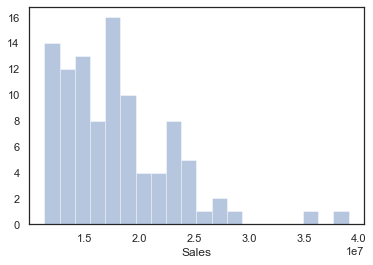

In [35]:
sns.set_style('white')
sns.distplot(df['Sales'], kde=False, bins=20);
#LOS DATOS ESTAN MUY CARGADOS A LA IZQUIERDA

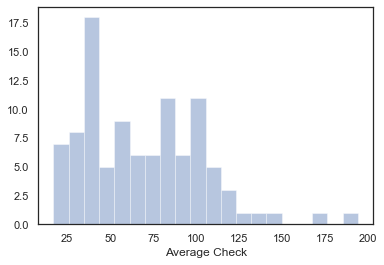

In [36]:
sns.set_style('white')
sns.distplot(df['Average Check'], kde=False, bins=20);
#LOS DATOS ESTAN MUY CARGADOS A LA IZQUIERDA

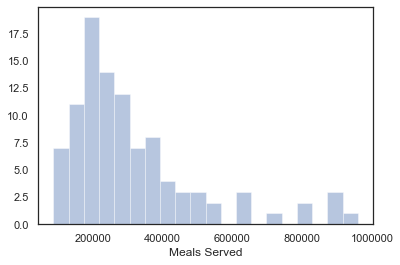

In [37]:
sns.set_style('white')
sns.distplot(df['Meals Served'], kde=False, bins=20);
#LOS DATOS ESTAN MUY CARGADOS A LA IZQUIERDA